In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_bronx = pd.read_excel('data/rollingsales_bronx.xls', skiprows=4)
df_brooklyn = pd.read_excel('data/rollingsales_brooklyn.xls', skiprows=4)
df_manhattan = pd.read_excel('data/rollingsales_manhattan.xls', skiprows=4)
df_queens = pd.read_excel('data/rollingsales_queens.xls', skiprows=4)
df_statenisland = pd.read_excel('data/rollingsales_statenisland.xls', skiprows=4)

In [5]:
pd.options.display.max_columns=None
df = pd.concat([df_bronx, df_brooklyn, df_manhattan, df_queens, df_statenisland])

In [7]:
df.columns

Index(['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62957 entries, 0 to 6103
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         62957 non-null  int64         
 1   NEIGHBORHOOD                    62957 non-null  object        
 2   BUILDING CLASS CATEGORY         62957 non-null  object        
 3   TAX CLASS AT PRESENT            62928 non-null  object        
 4   BLOCK                           62957 non-null  int64         
 5   LOT                             62957 non-null  int64         
 6   EASE-MENT                       0 non-null      float64       
 7   BUILDING CLASS AT PRESENT       62928 non-null  object        
 8   ADDRESS                         62957 non-null  object        
 9   APARTMENT NUMBER                14016 non-null  object        
 10  ZIP CODE                        62956 non-null  float64       
 11  RES

We will remove EASE-MENT as it does not have any values. Also APARTMENT NUMBER does not help here
Building class and Tax class at the time of sale is more important for our analysis than what it is now.

In [103]:
df = df.drop(['EASE-MENT', 'APARTMENT NUMBER', 'BUILDING CLASS AT PRESENT', 'TAX CLASS AT PRESENT', 'SALE DATE'], axis=1)

In [104]:
duplicates = sum(df.duplicated(df.columns))
print(duplicates)
df = df.drop_duplicates(df.columns, keep='last')

497


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62460 entries, 0 to 6103
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         62460 non-null  int64  
 1   NEIGHBORHOOD                    62460 non-null  object 
 2   BUILDING CLASS CATEGORY         62460 non-null  object 
 3   BLOCK                           62460 non-null  int64  
 4   LOT                             62460 non-null  int64  
 5   ADDRESS                         62460 non-null  object 
 6   ZIP CODE                        62459 non-null  float64
 7   RESIDENTIAL UNITS               48786 non-null  float64
 8   COMMERCIAL UNITS                38397 non-null  float64
 9   TOTAL UNITS                     50415 non-null  float64
 10  LAND SQUARE FEET                36768 non-null  float64
 11  GROSS SQUARE FEET               36768 non-null  float64
 12  YEAR BUILT                      5

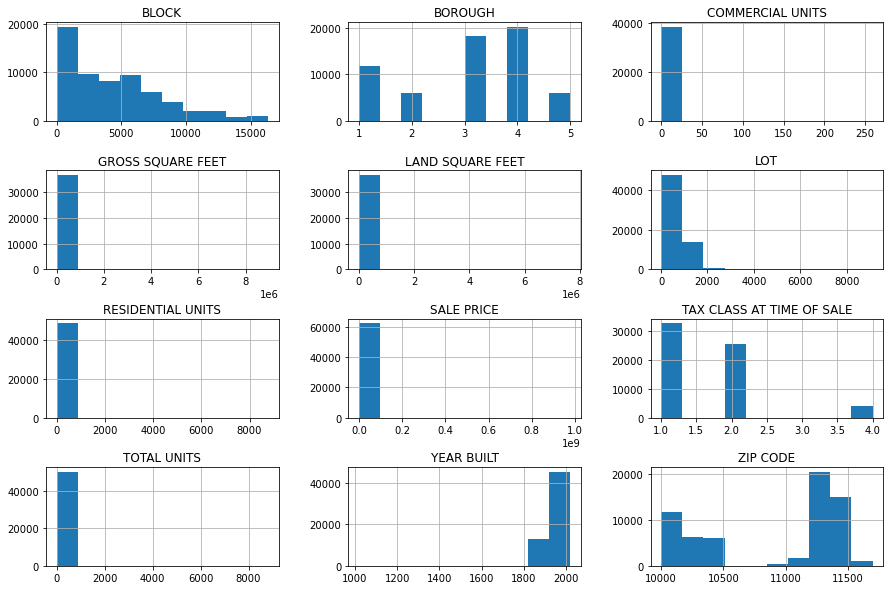

In [107]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

There are many skewed data here. We will analyze further.

In [109]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,62460.00,62460.00,62460.00,62459.00,48786.00,38397.00,50415.00,36768.00,36768.00,58240.00,62460.00,62460.00
mean,3.04,4493.75,362.04,10881.81,3.06,0.51,3.35,10977.47,7016.54,1951.00,1.61,1368431.15
std,1.25,3669.54,658.57,551.59,44.08,8.30,44.15,200814.32,74888.31,35.15,0.80,9590787.73
min,1.00,1.00,1.00,10001.00,0.00,0.00,0.00,0.00,0.00,1018.00,1.00,0.00
25%,2.00,1384.00,22.00,10309.00,1.00,0.00,1.00,2000.00,1357.00,1925.00,1.00,0.00
50%,3.00,3726.50,50.00,11211.00,1.00,0.00,1.00,2500.00,1920.00,1945.00,1.00,460000.00
75%,4.00,6630.00,350.00,11358.00,2.00,0.00,2.00,4000.00,2742.00,1970.00,2.00,870000.00
max,5.00,16350.00,9116.00,11697.00,8764.00,259.00,8812.00,7649136.00,8942176.00,2021.00,4.00,978090439.00


Sale price ranges from 0 to 978 million. We need to analyze further.

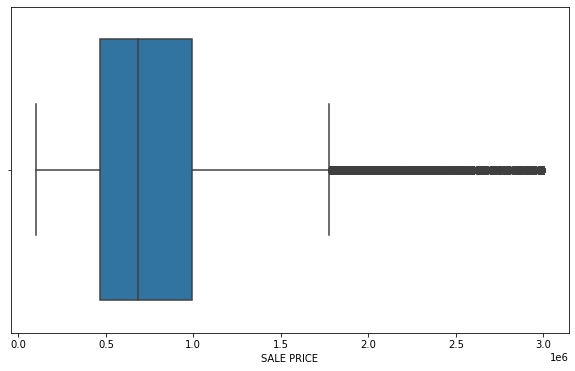

In [127]:
plt.figure(figsize=(10,6))
sns.boxplot(df['SALE PRICE'])

Most of the outliers are roughly the ones above 2 million. But we will include till 3 million and start from $100,000

In [113]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 3000000)]

In [114]:
df.shape

(36903, 16)

In [115]:
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,36903.00,36903.00,36903.00,36902.00,26531.00,19651.00,27408.00,18774.00,18774.00,34691.00,36903.00,36903.00
mean,3.08,4483.05,381.13,10874.60,3.03,0.60,3.36,13775.63,6761.82,1953.36,1.60,823334.29
std,1.28,3687.78,649.45,554.89,58.49,10.86,58.53,241081.03,89178.16,34.53,0.71,537562.92
min,1.00,1.00,1.00,10001.00,0.00,0.00,0.00,45.00,0.00,1800.00,1.00,101000.00
25%,2.00,1381.00,22.00,10309.00,1.00,0.00,1.00,2000.00,1300.00,1925.00,1.00,465000.00
50%,3.00,3680.00,51.00,11211.00,1.00,0.00,1.00,2500.00,1748.00,1950.00,2.00,682500.00
75%,4.00,6600.50,1002.00,11361.00,2.00,0.00,2.00,4000.00,2398.00,1975.00,2.00,990000.00
max,5.00,16350.00,9116.00,11697.00,8764.00,259.00,8812.00,6777433.00,8942176.00,2021.00,4.00,2999999.00


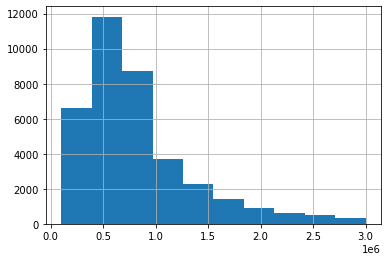

In [116]:
df['SALE PRICE'].hist()

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36903 entries, 1 to 6103
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         36903 non-null  int64  
 1   NEIGHBORHOOD                    36903 non-null  object 
 2   BUILDING CLASS CATEGORY         36903 non-null  object 
 3   BLOCK                           36903 non-null  int64  
 4   LOT                             36903 non-null  int64  
 5   ADDRESS                         36903 non-null  object 
 6   ZIP CODE                        36902 non-null  float64
 7   RESIDENTIAL UNITS               26531 non-null  float64
 8   COMMERCIAL UNITS                19651 non-null  float64
 9   TOTAL UNITS                     27408 non-null  float64
 10  LAND SQUARE FEET                18774 non-null  float64
 11  GROSS SQUARE FEET               18774 non-null  float64
 12  YEAR BUILT                      3

There are some null values in land and Gross square feet, we will leave it for now and clean up after analyzing further.
Also for simplicity we will rename TAX CLASS AT TIME OF SALE and BUILDING CLASS AT TIME OF SALE

In [ ]:
df = df.rename(columns = {'BUILDING CLASS AT TIME OF SALE':'BUILDING CLASS', 'TAX CLASS AT TIME OF SALE' : 'TAX CLASS'})

In [124]:
df.to_csv('data/dataWrangleNYRealEstate.csv', index=False)